```
Sourajita Dewasi 
Predictive Analytics(Lab Project 6)
```

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('snsdata.csv')
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
#Find the missing values from each column
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [ ]:
# Remove columns except 'basketball', 'football', 'soccer' and 'softball'
df1=df[['basketball', 'football', 'soccer', 'softball']]
df1

,basketball,football,soccer,softball
0,0,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
29995,0,0,0,0
29996,0,1,0,0
29997,0,1,0,0
29998,0,0,0,0


In [ ]:
#Setting an array of epsilon and min_samples
epsilon=[0.1,0.5,1.0,5.0,10.0]
min_samples=[10,20,30]

Epsilon: 0.1  and Minimum Samples: 10
Number of clusters: 88
Number of outliers: 929


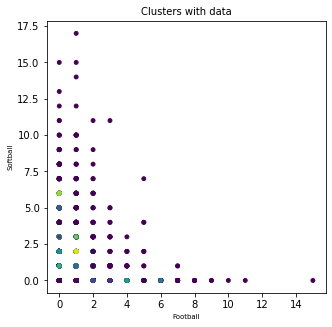

Epsilon: 0.1  and Minimum Samples: 20
Number of clusters: 54
Number of outliers: 1381


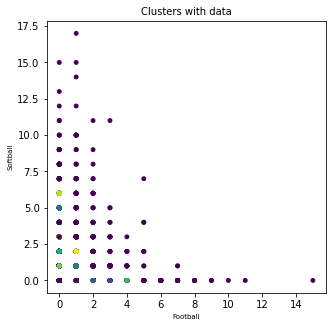

Epsilon: 0.1  and Minimum Samples: 30
Number of clusters: 43
Number of outliers: 1648


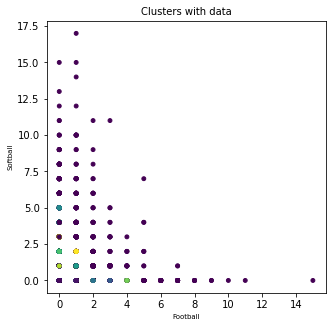

Epsilon: 0.5  and Minimum Samples: 10
Number of clusters: 88
Number of outliers: 929


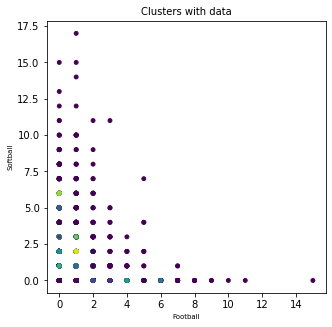

Epsilon: 0.5  and Minimum Samples: 20
Number of clusters: 54
Number of outliers: 1381


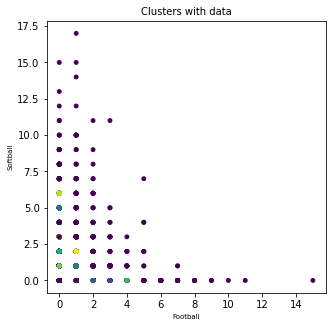

Epsilon: 0.5  and Minimum Samples: 30
Number of clusters: 43
Number of outliers: 1648


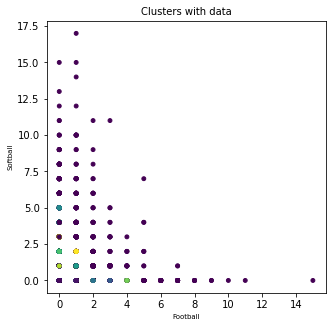

Epsilon: 1.0  and Minimum Samples: 10
Number of clusters: 2
Number of outliers: 164


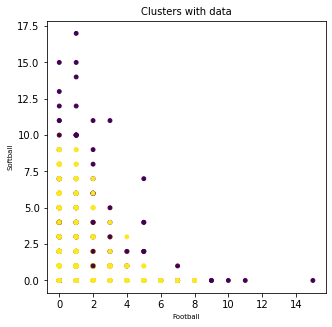

Epsilon: 1.0  and Minimum Samples: 20
Number of clusters: 2
Number of outliers: 229


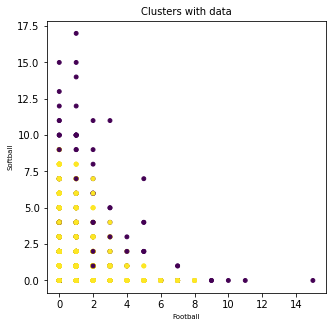

Epsilon: 1.0  and Minimum Samples: 30
Number of clusters: 2
Number of outliers: 289


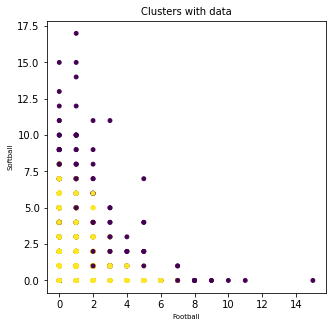

Epsilon: 5.0  and Minimum Samples: 10
Number of clusters: 2
Number of outliers: 6


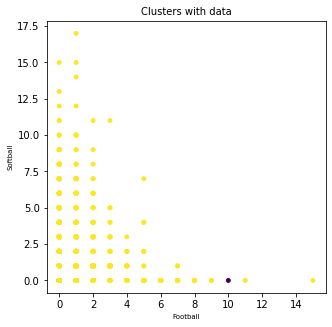

Epsilon: 5.0  and Minimum Samples: 20
Number of clusters: 2
Number of outliers: 6


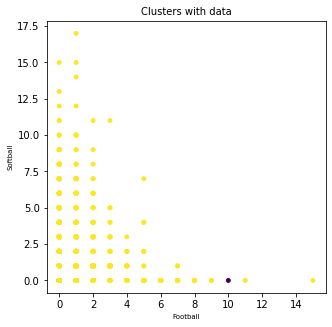

Epsilon: 5.0  and Minimum Samples: 30
Number of clusters: 2
Number of outliers: 7


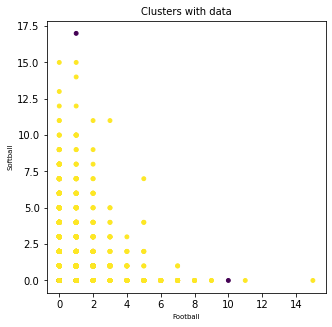

Epsilon: 10.0  and Minimum Samples: 10
Number of clusters: 2
Number of outliers: 1


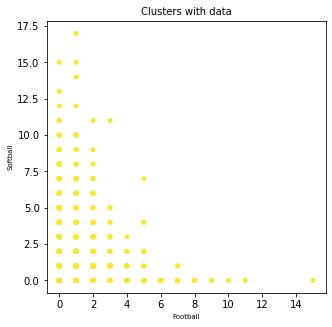

Epsilon: 10.0  and Minimum Samples: 20
Number of clusters: 2
Number of outliers: 3


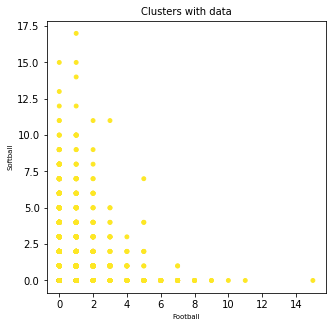

Epsilon: 10.0  and Minimum Samples: 30
Number of clusters: 2
Number of outliers: 3


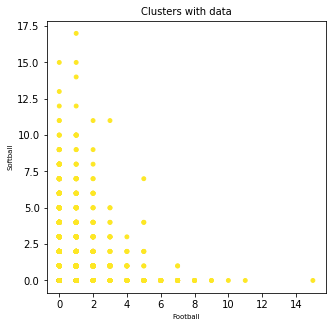

In [ ]:
#Computing DBSCAN wrt to epsilon and min_samples 
for i in epsilon:
  for j in min_samples:
    #fitting the model
    db = DBSCAN(eps=i, min_samples=j).fit(df1)
    #Setting the labels
    labels=db.labels_
    #Computing no of clusters
    no_clusters = len(np.unique(labels) )
    no_noise = np.sum(np.array(labels) == -1, axis=0)
    #Printing no of clusters and noise points
    print('Epsilon:', i, ' and Minimum Samples:', j)
    print('Number of clusters: %d' % no_clusters)
    print('Number of outliers: %d' % no_noise)
    #Assigning labels of DBSCAN
    df['DBSCAN_labels']=labels 

    # Plotting resulting clusters on the deafult parameters
    plt.figure(figsize=(5,5))
    plt.scatter(df['football'],df['softball'],c=df['DBSCAN_labels'],s=15)
    plt.title('Clusters with data',fontsize=10)
    plt.xlabel('Football',fontsize=7)
    plt.ylabel('Softball',fontsize=7)
    plt.show()